## Loading Library

In [321]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [322]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [323]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [324]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)


The overview reveals the dataset's structure, including missing values and column details.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-325-167af9a6a2f9>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time']).dt.date
<ipython-input-325-167af9a6a2f9>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['date_time']).dt.hour


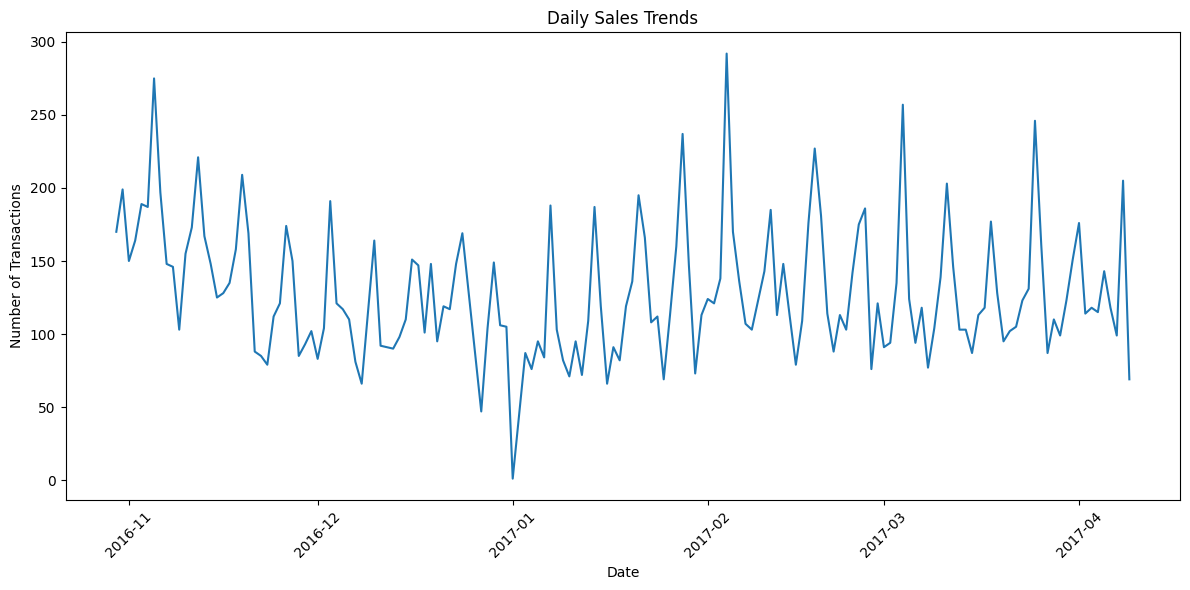

In [325]:
# 5
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['hour'] = pd.to_datetime(df['date_time']).dt.hour

plt.figure(figsize=(12, 6))
daily_transactions = df.groupby('date').size()
plt.plot(daily_transactions.index, daily_transactions.values, linestyle='-')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [326]:
# 6
df['date_time'] = pd.to_datetime(df['date_time'])
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()
df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-326-63680e6620bf>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


,Transaction,Item,date_time,period_day,weekday_weekend,date,hour,day,month,year,time,day_name
16995,8061,Bread,2017-03-13 09:31:00,morning,weekday,2017-03-13,9,13,3,2017,09:31:00,Monday
9310,4687,Bread,2017-01-14 12:42:00,afternoon,weekend,2017-01-14,12,14,1,2017,12:42:00,Saturday
19535,9238,Coffee,2017-04-02 09:54:00,morning,weekend,2017-04-02,9,2,4,2017,09:54:00,Sunday
15128,7248,Coffee,2017-02-26 13:48:00,afternoon,weekend,2017-02-26,13,26,2,2017,13:48:00,Sunday
808,401,Bread,2016-11-03 14:14:00,afternoon,weekday,2016-11-03,14,3,11,2016,14:14:00,Thursday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


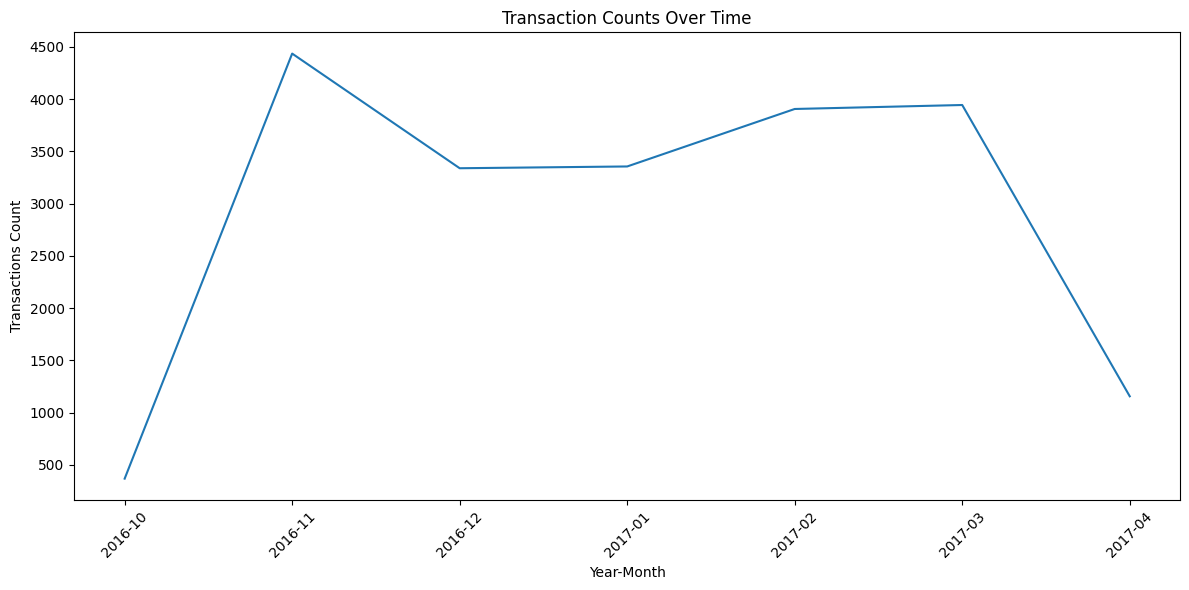

In [327]:
# 7
plt.figure(figsize=(12, 6))
df['year_month'] = df['date_time'].dt.to_period('M')
monthly_transactions = df.groupby('year_month').size()
plt.plot(monthly_transactions.index.astype(str), monthly_transactions.values, linestyle='-')
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transactions Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

A sharp rise in transactions in November 2016, stable trends until March 2017, and a steep drop in April 2017.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [328]:
#9
weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

print(f"Unique weekday names: {weekday_names}")
print(f"Unique weekend names: {weekend_names}")

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [329]:
#10
df['day_name'] = pd.Categorical(df['day_name'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

aggregated_data = df.groupby(['month', 'day_name']).size().unstack(fill_value=0)

aggregated_data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-329-06953cd0132b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = df.groupby(['month', 'day_name']).size().unstack(fill_value=0)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

Saturdays consistently have the highest transaction counts across most months, followed by Sundays, while weekdays typically have lower transaction counts.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


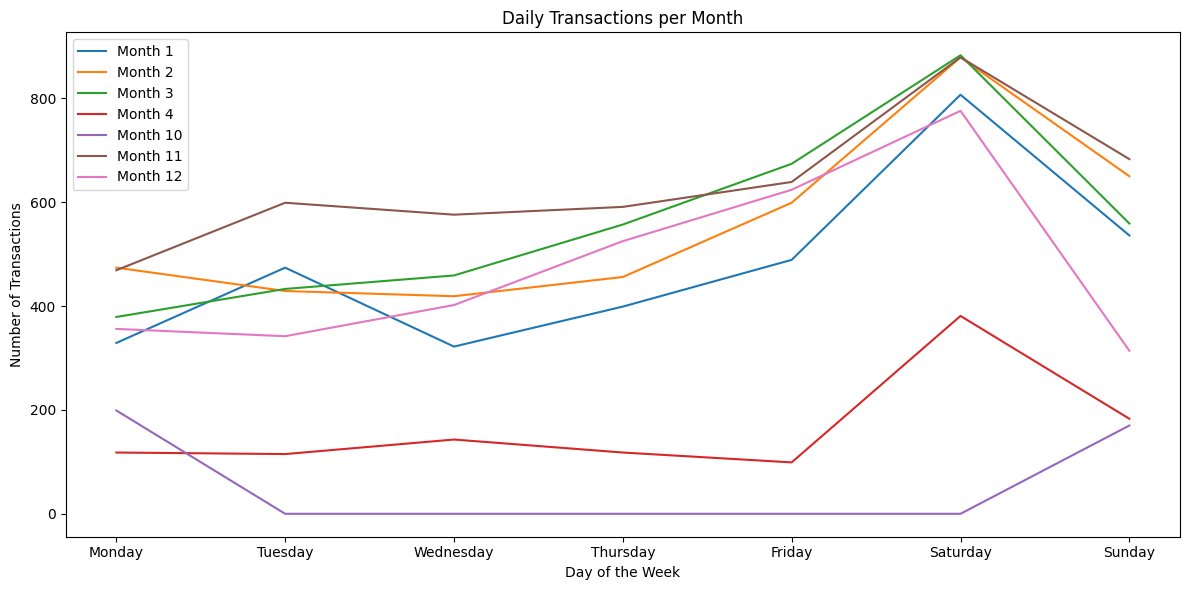

In [330]:
# 12
plt.figure(figsize=(12, 6))

for month in aggregated_data.index:
    month_data = aggregated_data.loc[month]
    plt.plot(month_data.index, month_data.values, label=f'Month {month}')

plt.title('Daily Transactions per Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.legend()
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

Show weekends, particularly Saturdays, consistently have the highest transactions across months, while weekdays exhibit lower and steadier transaction patterns.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [331]:
# 14
df['period_day'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [332]:
# 15
morning_hours = df[df['period_day'] == 'morning']['hour']
afternoon_hours = df[df['period_day'] == 'afternoon']['hour']
evening_hours = df[df['period_day'] == 'evening']['hour']
night_hours = df[df['period_day'] == 'night']['hour']

print(f"Morning Hours: {morning_hours.unique()}")
print(f"Afternoon Hours: {afternoon_hours.unique()}")
print(f"Evening Hours: {evening_hours.unique()}")
print(f"Night Hours: {night_hours.unique()}")

Morning Hours: [ 9 10 11  8  7  1]
Afternoon Hours: [12 13 14 15 16]
Evening Hours: [17 18 19 20]
Night Hours: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

This inconsistency happens because of the specific way you’ve defined the hour bins (0-6, 6-12, etc.), which results in an unexpected ordering of hours within each category.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-333-960989c93b37>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_data = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)


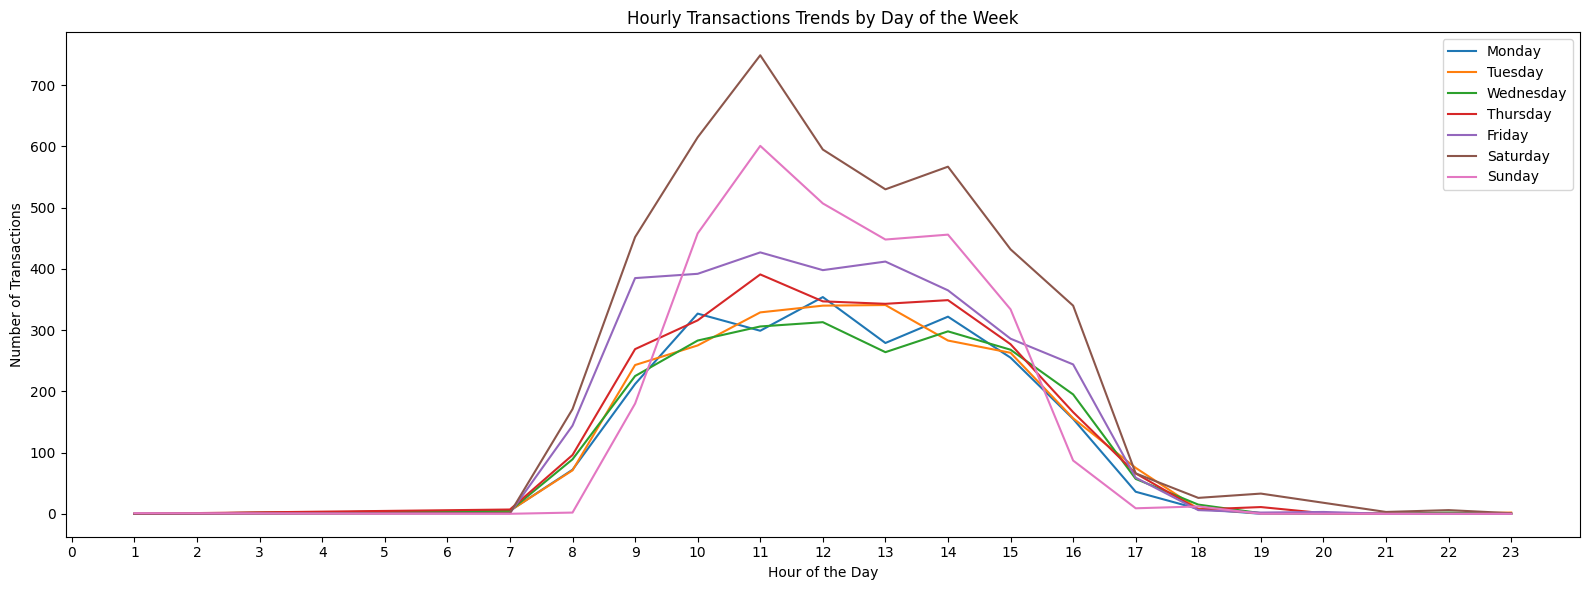

In [333]:
# 17
hour_data = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 6))
for day in hour_data.columns:
    plt.plot(hour_data.index, hour_data[day], label=day)

plt.title('Hourly Transactions Trends by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend()
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that _______

Sales are highest in the afternoon and lowest in the late evening. This pattern is consistent across weekdays and weekends, with weekdays having slightly higher peaks.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


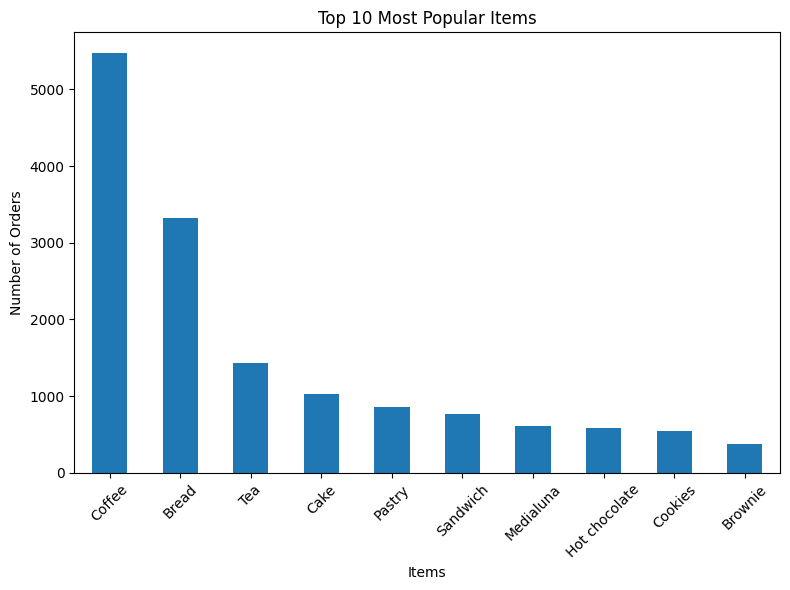

In [334]:
# 19
plt.figure(figsize=(8, 6))
item_counts = df['Item'].value_counts()
top_10_items = item_counts.head(10)
top_10_items.plot(kind='bar')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Items')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-335-8d42fb1546a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')


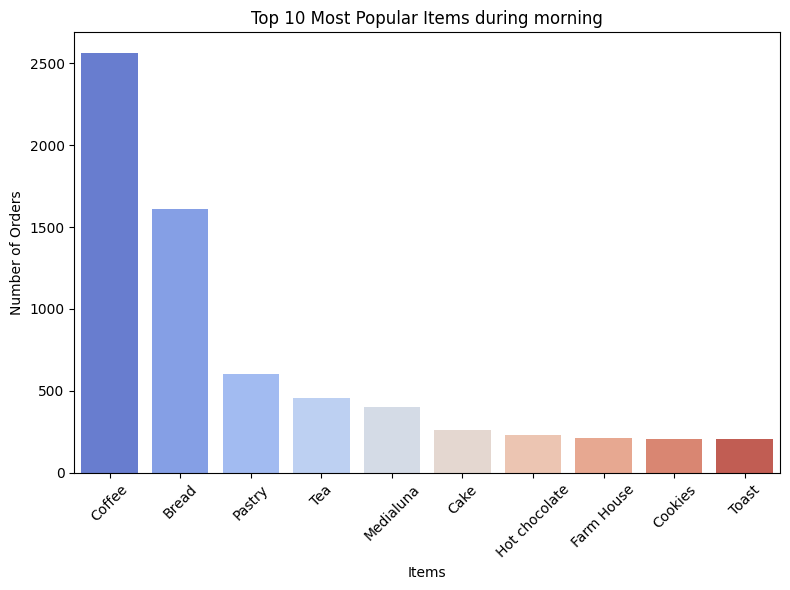

<ipython-input-335-8d42fb1546a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')


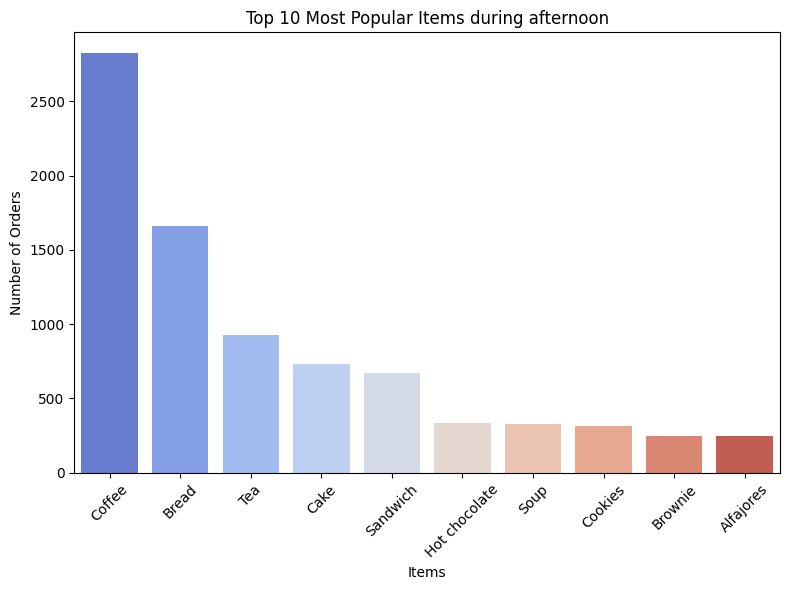

<ipython-input-335-8d42fb1546a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')


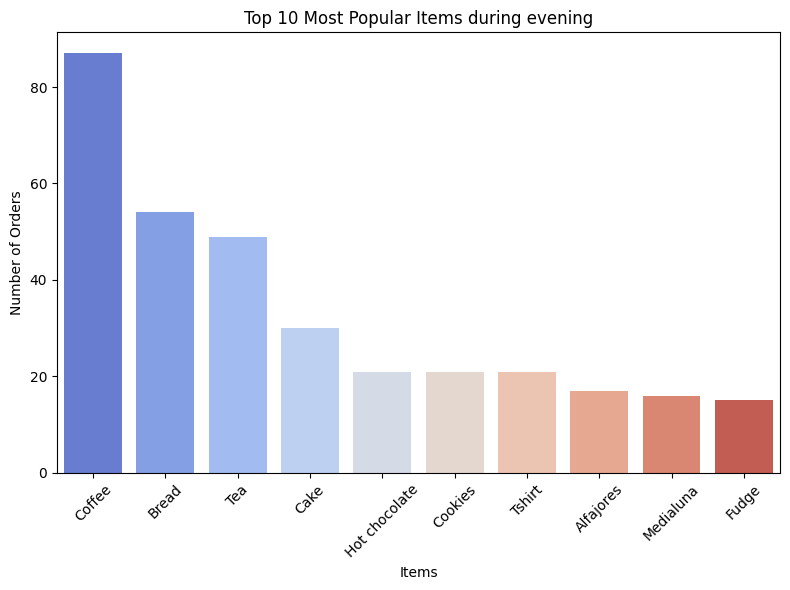

<ipython-input-335-8d42fb1546a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')


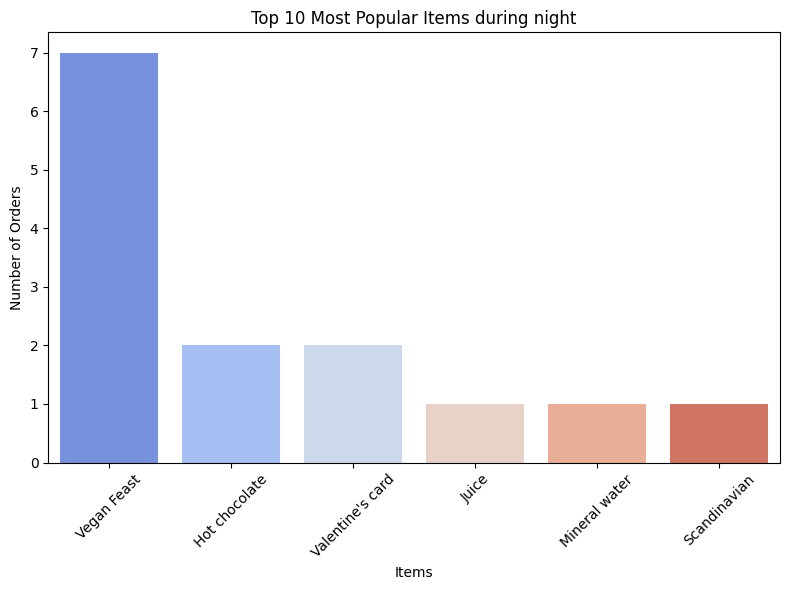

In [335]:
# 20
import seaborn as sns
import matplotlib.pyplot as plt

for period in df['period_day'].unique():
    period_data = df[df['period_day'] == period]
    item_counts = period_data['Item'].value_counts().nlargest(10)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=item_counts.index, y=item_counts.values, palette='coolwarm')
    plt.title(f'Top 10 Most Popular Items during {period}')
    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


21. It turns out that there is something different in the plot above, the insight is ____


Coffee is the most popular item across all time periods, followed by bread and tea. However, the specific items that follow change depending on the time of day.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


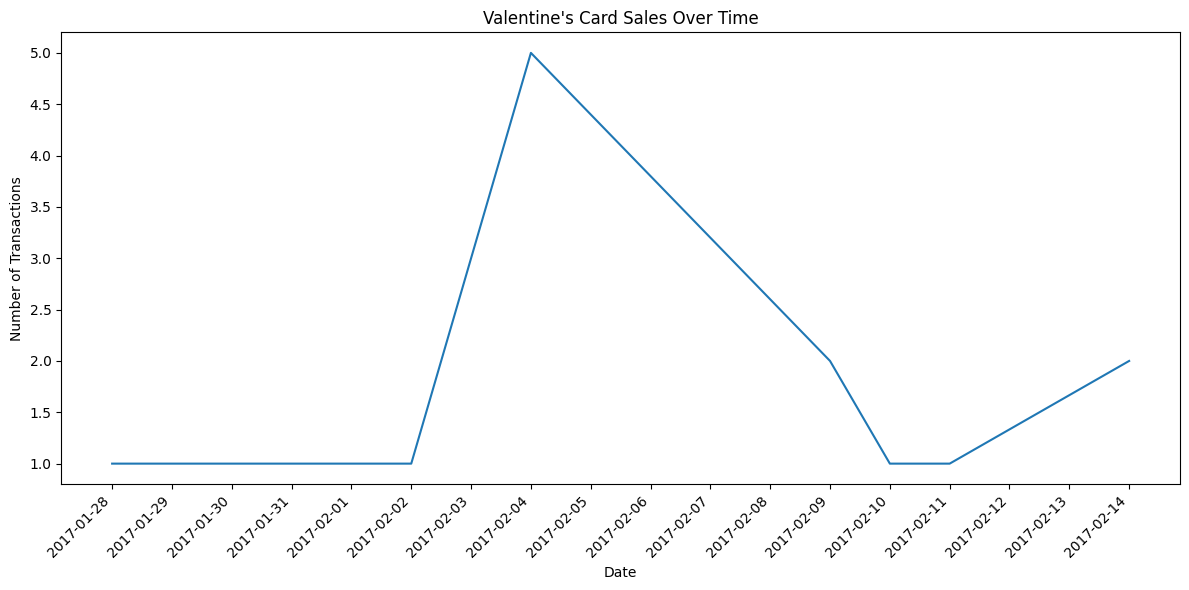

In [336]:
#22
plt.figure(figsize=(12, 6))
valentine_data = df[df['Item'] == "Valentine's card"]
valentine_counts = valentine_data['date'].value_counts().sort_index()
all_dates = pd.date_range(start='2017-01-28', end='2017-02-14')

plt.plot(valentine_counts.index, valentine_counts.values, linestyle='-')
plt.title('Valentine\'s Card Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

plt.xticks(all_dates, rotation=45, ha='right')
plt.tight_layout()
plt.show()


23. I found the insight from the sale of the Valentine's cards above is ____


The Valentine's card sales data reveals a sharp spike in sales leading up to and on Valentine's Day itself (February 14th, 2017). Sales were minimal before this period and dropped significantly afterward.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [337]:
# 24
df_encoded = pd.get_dummies(df['Item'], prefix='', prefix_sep='')
df_encoded = pd.concat([df['Transaction'], df_encoded], axis=1)
df_encoded = df_encoded.groupby('Transaction').sum()
df_encoded = df_encoded.applymap(lambda x: float(x > 0))

df_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-337-714ccf47b214>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: float(x > 0))


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [338]:
#25
df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)
df_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-338-1c8422ed1906>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [339]:
# 26
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [340]:
# 27
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
7,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



- Sales Trends: Sales exhibit a consistent pattern across the week, peaking in the afternoon and declining in the evening.
- Popular Items: Coffee is the most popular item across all time periods, followed by bread and tea. However, other popular items vary by time of day.
- Valentine's Day Sales: There was a significant spike in sales of Valentine's cards leading up to and on Valentine's Day.
- Item Associations: The Apriori algorithm identified frequent itemsets, such as coffee and bread being often purchased together.